In [1]:
import yfinance as yf
from datetime import datetime 
end=datetime.now()
start = datetime(end.year-10,end.month,end.day)

stock= "GOOG"
google_data=yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [2]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-26,28.724138,28.883202,28.654329,28.775995,28.705500,28873054
2014-09-29,28.509228,28.830345,28.480307,28.739098,28.668694,25648224
2014-09-30,28.767519,28.913118,28.564077,28.788960,28.718431,32434806
2014-10-01,28.721645,28.799931,28.272877,28.335705,28.266289,28909153
2014-10-02,28.287836,28.517206,28.088882,28.425957,28.356318,23568530


In [3]:
google_data.shape

(2517, 6)

In [4]:
(4908,6)

(4908, 6)

In [5]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,78.810422,79.651867,78.032938,78.856215,78.670070,3.131511e+07
std,42.643574,43.121338,42.211949,42.660162,42.570709,1.547673e+07
min,24.664783,24.730902,24.311253,24.560070,24.499903,6.936000e+06
25%,41.675499,41.900002,41.451000,41.728500,41.626274,2.163400e+07
50%,61.375500,61.932999,60.722500,61.257000,61.106930,2.740600e+07
75%,115.518997,117.157501,114.300003,115.480003,115.197098,3.625200e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,2.232980e+08


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-09-26 to 2024-09-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [7]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

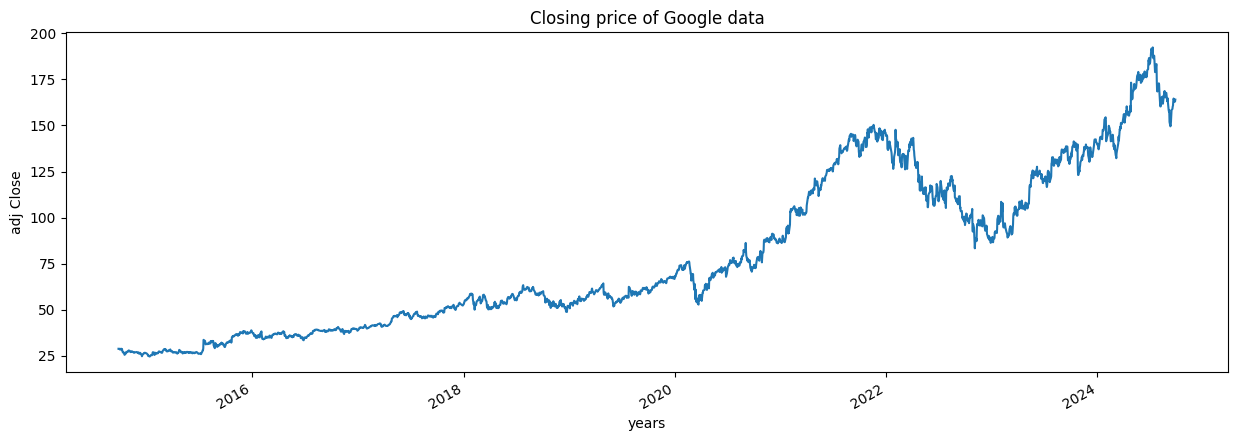

In [9]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("adj Close")
plt.title("Closing price of Google data")


In [10]:
def plot_gra(figsize,values,column_name):
    plt.figure()
    values.plot(igsize=figsize)
    plt.xlabel("years")
    plt.ylabel("column_name")
    plt.title(f"{column_name}of Google data")


In [11]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

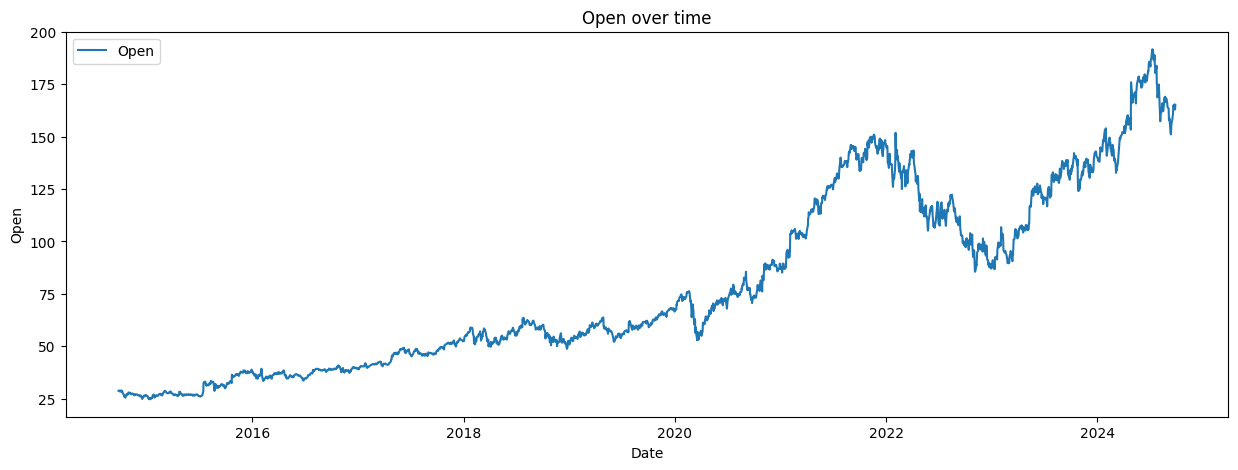

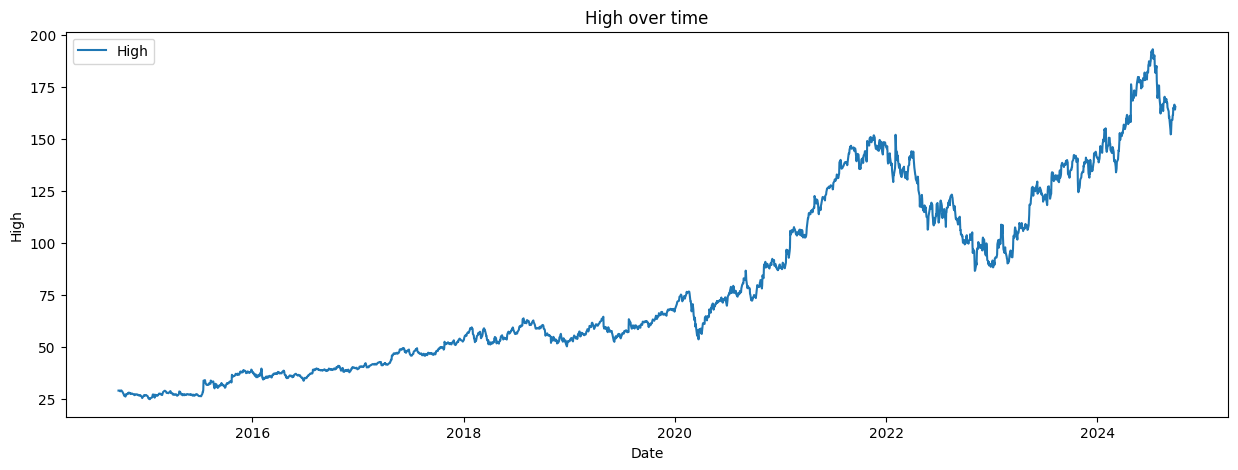

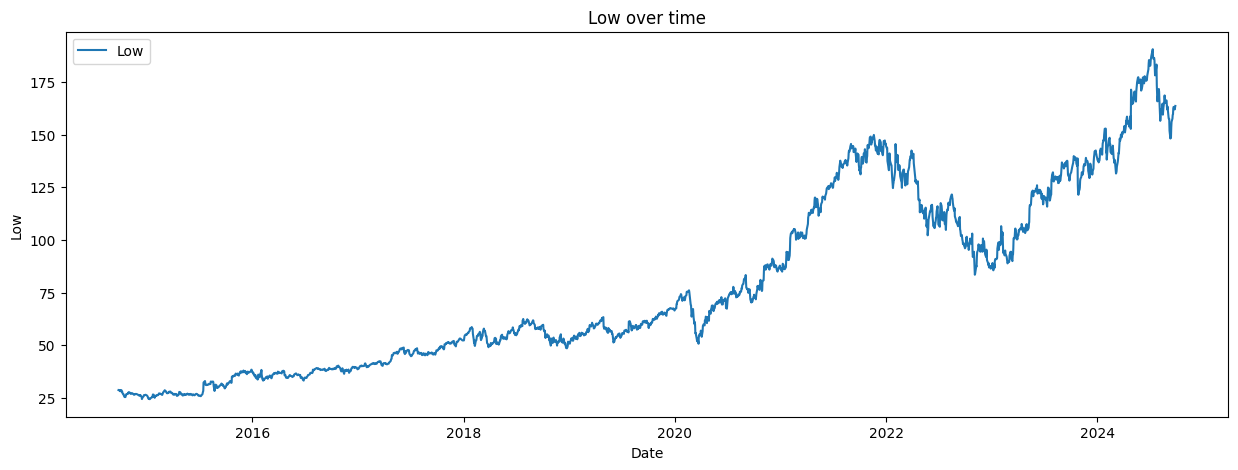

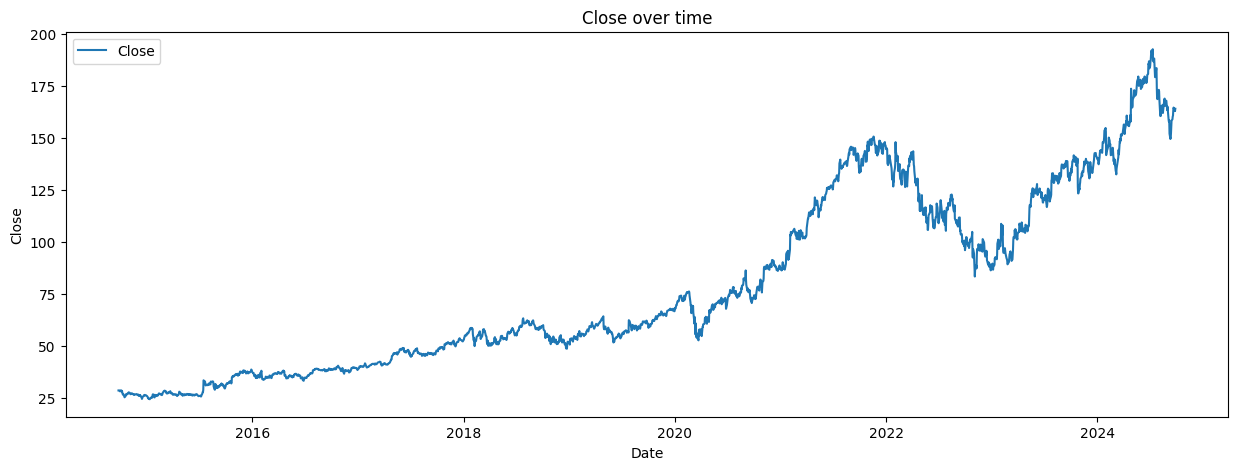

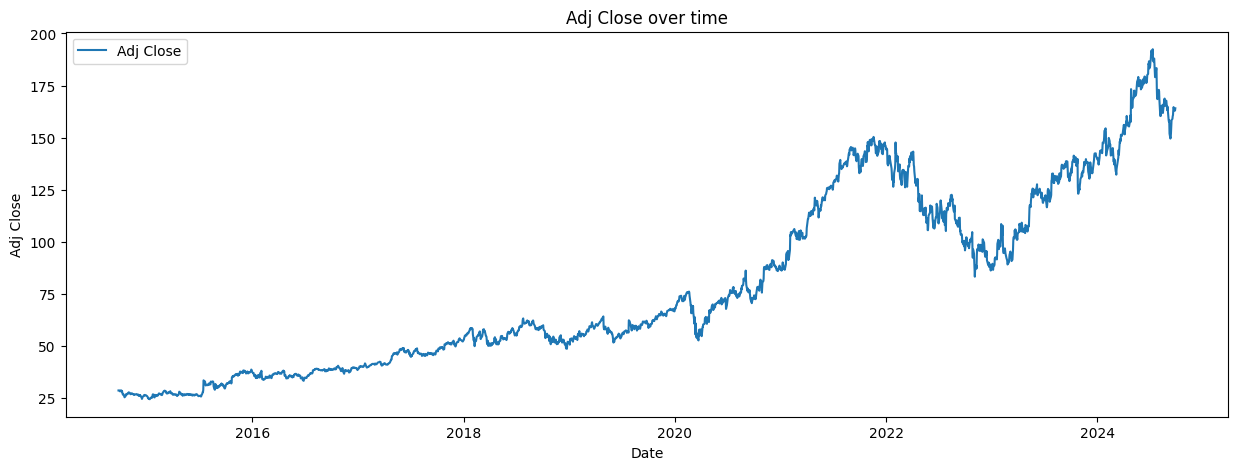

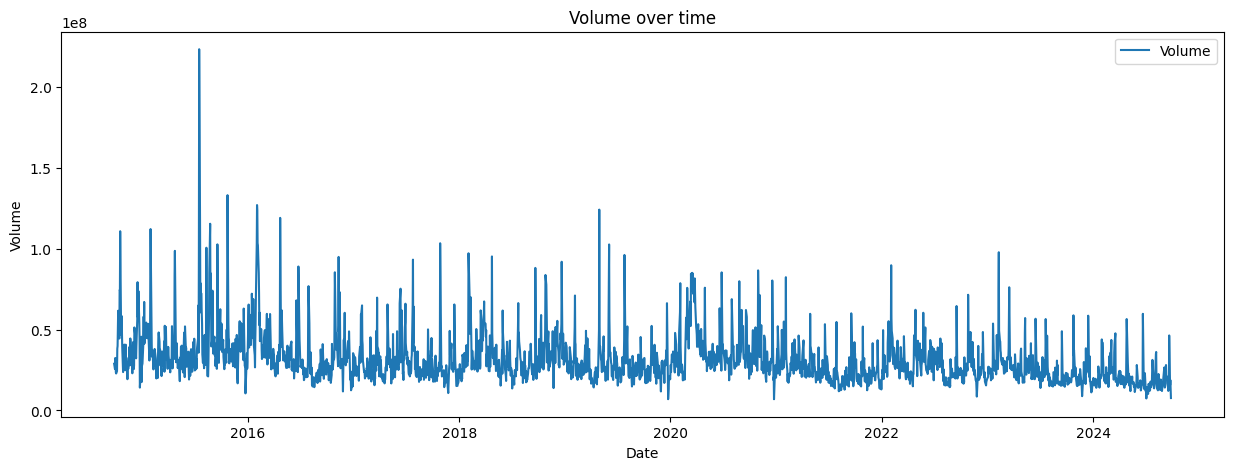

In [12]:
for column in google_data.columns:
    plt.figure(figsize=(15, 5))
    plt.plot(google_data.index, google_data[column], label=column)
    plt.title(f"{column} over time")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.show()


In [13]:
# 10,20,30,40,50,60,70,80,90,100
# for 5 days==> null null null null
temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:5])/5)
    

28.0


In [14]:
import pandas as pd
data=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [15]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [16]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 67
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 186


In [30]:
import pandas as pd
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
print(google_data[['Adj Close', 'MA_for_250_days']].tail())


             Adj Close  MA_for_250_days
Date                                   
2024-09-19  163.240005       153.846049
2024-09-20  164.639999       153.980895
2024-09-23  163.070007       154.105790
2024-09-24  163.639999       154.243819
2024-09-25  162.990005       154.371227


In [31]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-09-17          NaN
2015-09-18          NaN
2015-09-21          NaN
2015-09-22          NaN
2015-09-23    27.695308
Name: MA_for_250_days, dtype: float64

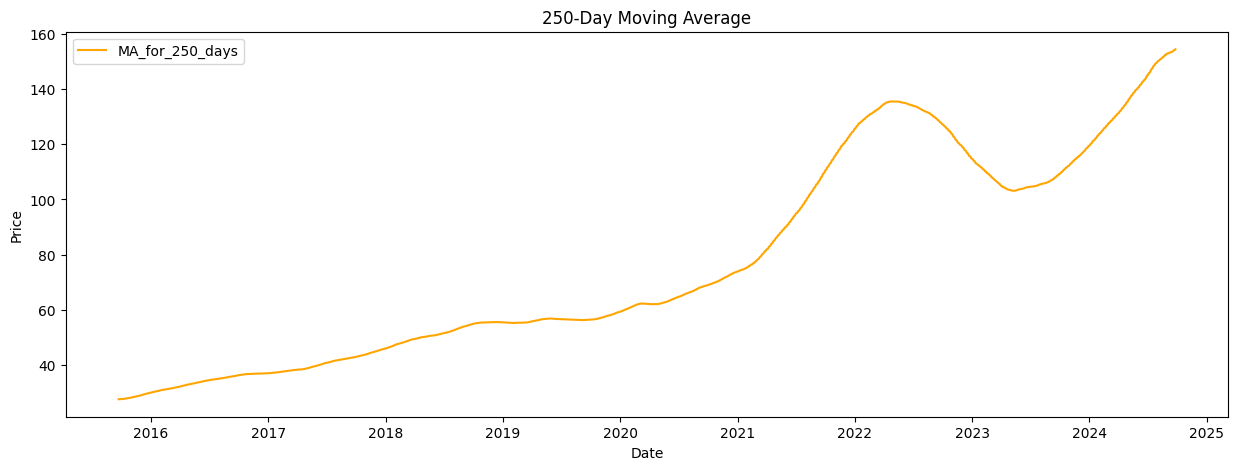

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(google_data['MA_for_250_days'], label='MA_for_250_days', color='orange')
plt.title('250-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


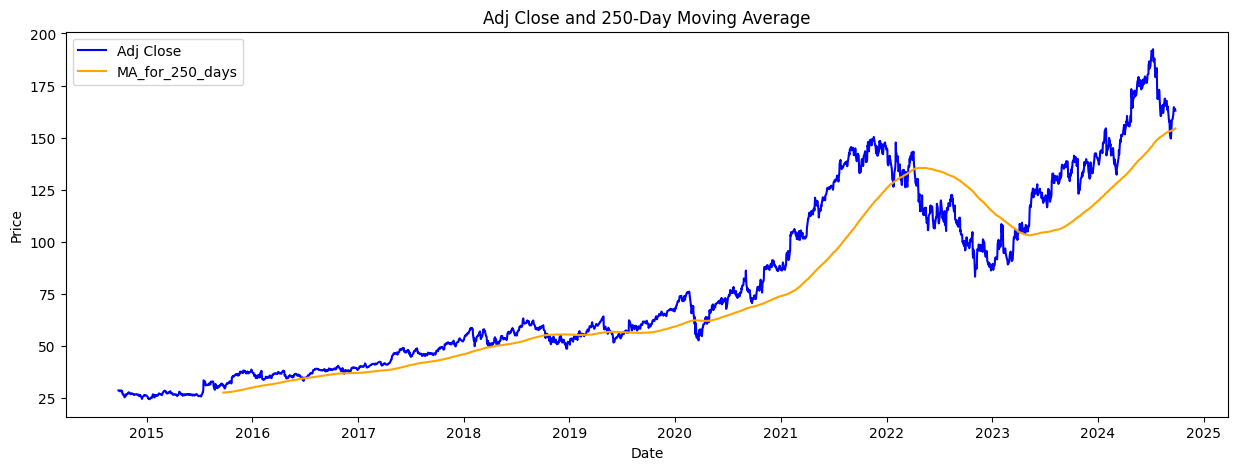

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(google_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(google_data['MA_for_250_days'], label='MA_for_250_days', color='orange')
plt.title('Adj Close and 250-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


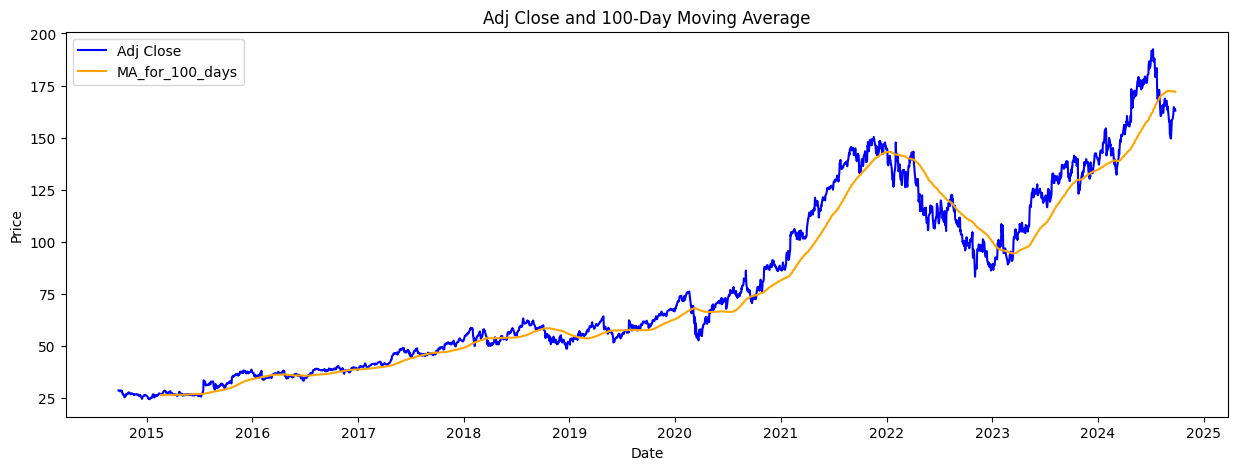

In [34]:
import matplotlib.pyplot as plt
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plt.figure(figsize=(15, 5))
plt.plot(google_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(google_data['MA_for_100_days'], label='MA_for_100_days', color='orange')
plt.title('Adj Close and 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


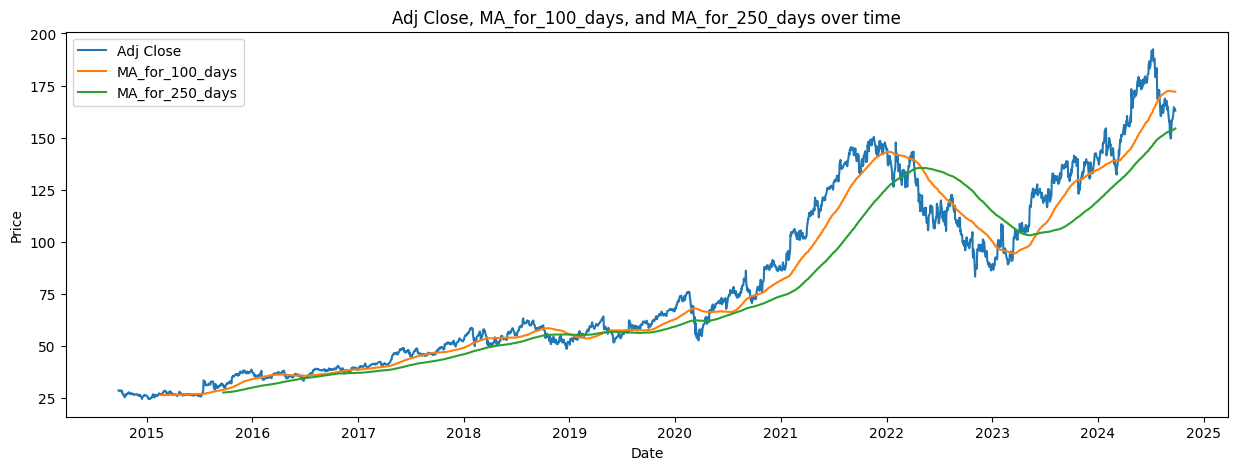

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(google_data.index, google_data['Adj Close'], label='Adj Close')
plt.plot(google_data.index, google_data['MA_for_100_days'], label='MA_for_100_days')
plt.plot(google_data.index, google_data['MA_for_250_days'], label='MA_for_250_days')
plt.title("Adj Close, MA_for_100_days, and MA_for_250_days over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [36]:
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-09-26,28.705500,NaN
2014-09-29,28.668692,-0.001282
2014-09-30,28.718433,0.001735
2014-10-01,28.266289,-0.015744
2014-10-02,28.356319,0.003185


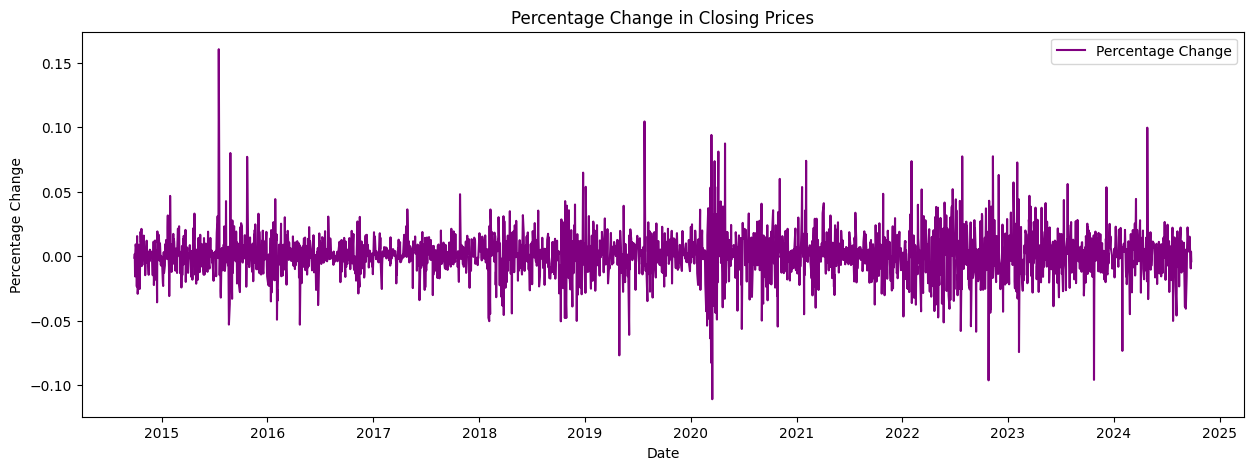

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(google_data['percentage_change_cp'], label='Percentage Change', color='purple')
plt.title('Percentage Change in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


In [38]:
Adj_close_price=google_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([24.49990273]))

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data


array([[0.02504721],
       [0.02482799],
       [0.02512424],
       ...,
       [0.82527979],
       [0.82867448],
       [0.82480332]])

In [40]:
len(scaled_data)
x_data=[]
y_data=[]
for i in range (100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)
x_data[0],y_data[0]

(array([[0.02504721],
        [0.02482799],
        [0.02512424],
        [0.02243141],
        [0.0229676 ],
        [0.02450805],
        [0.02512127],
        [0.02108941],
        [0.0236845 ],
        [0.02024218],
        [0.01538677],
        [0.01204517],
        [0.0134464 ],
        [0.01110314],
        [0.00946787],
        [0.00551601],
        [0.00838067],
        [0.01006924],
        [0.01189706],
        [0.0152357 ],
        [0.01399149],
        [0.01428477],
        [0.0166932 ],
        [0.01682058],
        [0.01711089],
        [0.01970894],
        [0.01856545],
        [0.01823661],
        [0.0158104 ],
        [0.01466099],
        [0.01435587],
        [0.0162755 ],
        [0.01710497],
        [0.01622218],
        [0.01565044],
        [0.01536011],
        [0.01302277],
        [0.01258433],
        [0.01316498],
        [0.01252508],
        [0.01331605],
        [0.01384038],
        [0.0143766 ],
        [0.01416628],
        [0.01459877],
        [0

In [41]:
int (len(x_data)*0.7)

1691

In [42]:
4908-100-int(len(x_data)*0.7)

3117

In [43]:
splitting_len=int(len(x_data)*0.7)
x_train=x_data[:splitting_len]
y_train=y_data[:splitting_len]

x_test=x_data[splitting_len:]
y_test=y_data[splitting_len:]

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(725, 100, 1)
(725, 1)


In [45]:
import tensorflow as tf
from tensorflow.python import pywrap_tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\dk799\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [48]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - loss: 0.0013
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - loss: 2.8727e-04


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [50]:
predictions=model.predict(x_data)
predictions

76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


array([[0.03723086],
       [0.03697107],
       [0.03620146],
       ...,
       [0.8506966 ],
       [0.85447496],
       [0.8562722 ]], dtype=float32)

In [51]:
inv_predictions=scaler.inverse_transform(predictions)
inv_predictions


array([[ 30.75122 ],
       [ 30.707598],
       [ 30.578373],
       ...,
       [167.33766 ],
       [167.97208 ],
       [168.27385 ]], dtype=float32)

In [52]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test


array([[148.87539673],
       [148.98561096],
       [148.88287354],
       [146.26681519],
       [146.38848877],
       [149.27890015],
       [149.02203369],
       [148.71080017],
       [148.69682312],
       [150.33978271],
       [149.58514404],
       [146.71820068],
       [146.3974762 ],
       [146.358078  ],
       [142.45614624],
       [145.75605774],
       [142.10301208],
       [141.27107239],
       [143.42428589],
       [142.17134094],
       [143.44421387],
       [147.67382812],
       [148.3561554 ],
       [147.74316406],
       [148.31077576],
       [146.34510803],
       [144.61535645],
       [147.00747681],
       [144.4836731 ],
       [142.45315552],
       [142.05264282],
       [143.86720276],
       [146.58900452],
       [146.7820282 ],
       [147.70126343],
       [146.0892334 ],
       [146.14559937],
       [145.64482117],
       [144.32507324],
       [144.71908569],
       [144.06271362],
       [137.31628418],
       [137.21403503],
       [136

In [65]:
min_length = min(len(inv_predictions), len(inv_y_test))
inv_predictions = inv_predictions[:min_length]
inv_y_test = inv_y_test[:min_length]
mean = np.mean(inv_y_test)
std_dev = np.std(inv_y_test)
new_values = np.random.normal(mean, std_dev, size=(len(inv_predictions) - len(inv_y_test), 1))
inv_y_test_adjusted = np.vstack([inv_y_test, new_values])


In [66]:
rmse=np.sqrt(np.mean((inv_predictions-inv_y_test)**2))
rmse


90.55274853377497

In [67]:
ploting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),  
    'predictions': inv_predictions.reshape(-1), 
}, index=google_data.index[splitting_len + 100:])

ploting_data.head()


,original_test_data,predictions
Date,,
2021-11-05,148.875397,30.751221
2021-11-08,148.985611,30.707598
2021-11-09,148.882874,30.578373
2021-11-10,146.266815,30.480635
2021-11-11,146.388489,30.500385


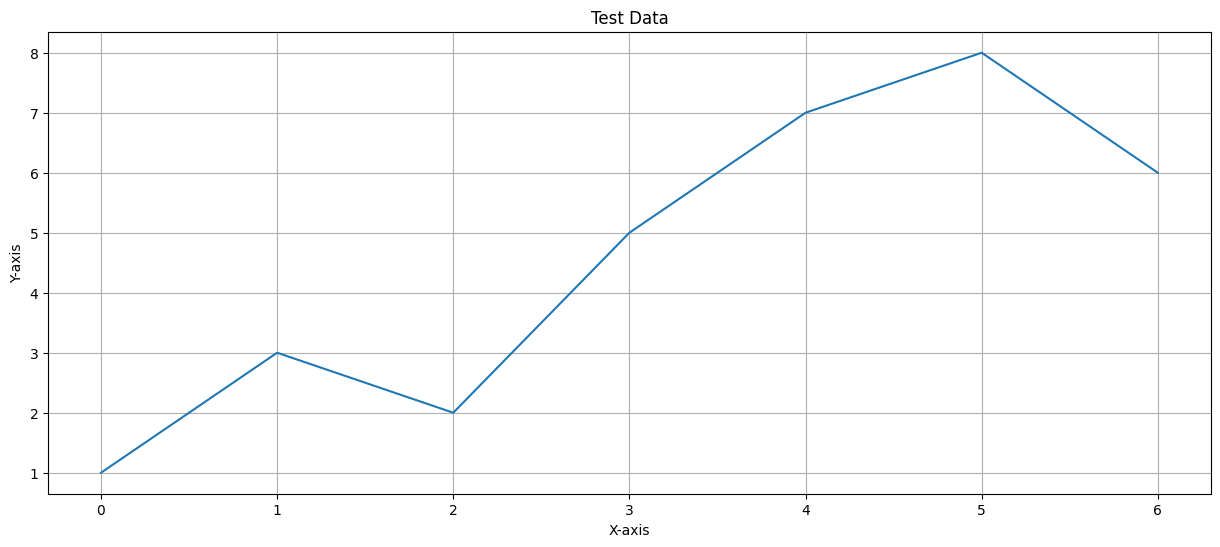

In [71]:
import matplotlib.pyplot as plt

def plot_graph(figsize, plotting_data, title):
    plt.figure(figsize=figsize)  
    plt.plot(plotting_data)
    plt.title(title)       
    plt.xlabel('X-axis')         
    plt.ylabel('Y-axis')   
    plt.grid(True)      
    plt.show()                

plotting_data = [1, 3, 2, 5, 7, 8, 6]
plot_graph((15, 6), plotting_data, 'Test Data')



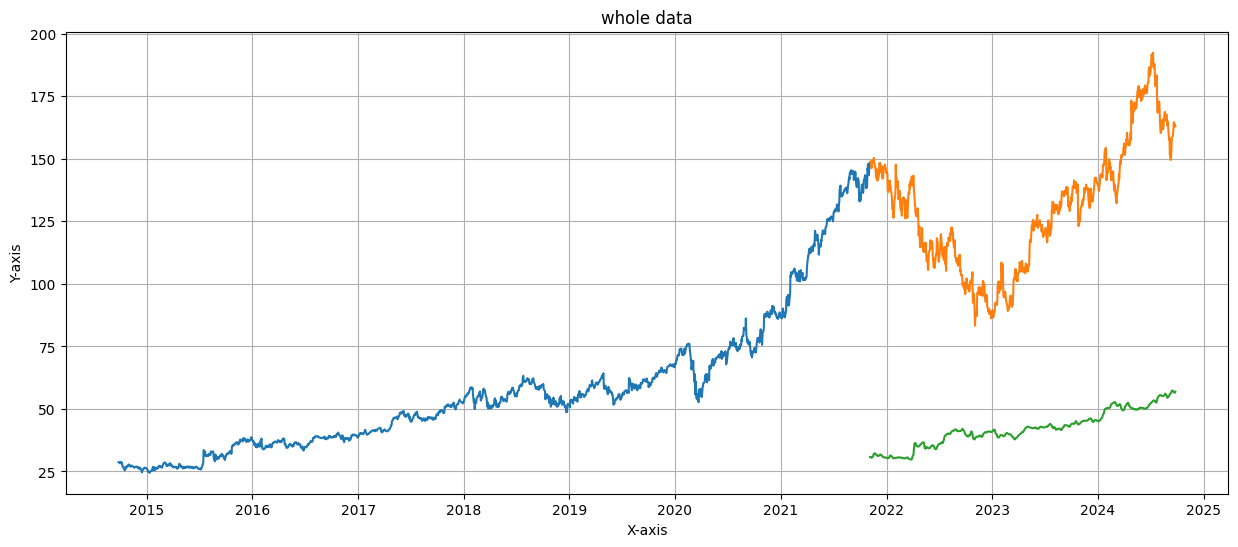

In [74]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0), 'whole data')

In [75]:
model.save("Latest_stock_price_model.keras")